<a href="https://colab.research.google.com/github/farheenfathimaa/practice/blob/main/Attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is Attention?
Attention mechanisms in deep learning help the model focus on the most relevant parts of the input when making predictions. They are particularly useful in tasks like language translation or text summarization, where the context of specific words or phrases matters.

## Overview of the Steps
We will implement a simple attention mechanism in the context of sequence-to-sequence models. The attention mechanism calculates attention scores, applies these scores to the input sequence, and returns a weighted sum.

##Step-by-Step Guide
###**Step 1:** Install Required Libraries
We will use numpy for basic operations.

`pip install numpy`

###**Step 2:** Define the Input Data
For this example, let's create some mock data representing a sequence of word embeddings (vectors). Each embedding could represent a word in a sentence.

In [1]:
import numpy as np

# Mock data: sequence of word embeddings (3 words, each with a 4-dimensional vector)
input_sequence = np.array([
    [0.1, 0.2, 0.3, 0.4], # word 1
    [0.2, 0.1, 0.4, 0.3], # word 2
    [0.3, 0.5, 0.2, 0.1]  # word 3
])

print("Input sequence shape:", input_sequence.shape)

Input sequence shape: (3, 4)


###**Step 3:** Define the Attention Mechanism
We will calculate attention scores using a simple dot product between a "query" and each "key" (input embedding), followed by applying the softmax function to normalize the scores.

In [2]:
def softmax(x):
  """Compute the softmax of vector x."""
  exp_x = np.exp(x - np.max(x)) # Subtract max to prevent overflow
  return exp_x / exp_x.sum(axis=0)

def attention(query, keys):
  """Compute the attention scores and return the context vector.

    Args:
        query: The query vector (1D array).
        keys: The key vectors (2D array, shape: [num_keys, key_dim]).

    Returns:
        context_vector: The weighted sum of the keys.
        attention_weights: The attention scores (normalized).
  """
  # Step 1: Compute the dot product between the query and each key
  attention_scores = np.dot(keys, query)

  # Step 2: Apply softmax to get attention weights
  attention_weights = softmax(attention_scores)

  # Step 3: Compute the context vector as the weighted sum of the keys
  context_vector = np.sum(keys * attention_weights[:, np.newaxis], axis=0)

  return context_vector, attention_weights

###**Step 4:** Use the Attention Mechanism
Let's define a query vector and use it to compute the attention scores and context vector.

In [3]:
# Define a query vector (for simplicity, we'll use a random vector)
query_vector = np.array([0.3, 0.2, 0.4, 0.1])

# Compute attention
context, weights = attention(query_vector, input_sequence)

print("Attention weights: ", weights)
print("Context vector:", context)

Attention weights:  [0.3234067  0.33660518 0.33998812]
Context vector: [0.20165814 0.26833592 0.29966171 0.26434305]


##Explanation of the Code
1. **Input Sequence:** `input_sequence` is a 2D array where each row represents a word embedding.
2. **Query Vector:** `query_vector `represents what we are focusing on in the input. In practice, this could come from another part of the model.
3. **Dot Product:** We compute the similarity between the query and each key (word embedding) using the dot product.
4. **Softmax:** We normalize the attention scores using the softmax function.
5. **Context Vector:** This is the weighted sum of the input embeddings, where the weights are the attention scores.

---

### Function: `softmax(x)`

1. **`def softmax(x):`**
   - This line defines a function called `softmax` that takes a single argument `x`. The `softmax` function will compute the softmax of the input vector `x`.

2. **`"""Compute the softmax of vector x."""`**
   - This is a docstring, which describes what the function does. Here, it mentions that the function computes the softmax of a given vector `x`.

3. **`exp_x = np.exp(x - np.max(x))`**
   - `np.exp(x - np.max(x))`: This line computes the exponential of each element in `x`, after subtracting the maximum value in `x` from each element. Subtracting `np.max(x)` is a numerical stability trick to prevent very large exponentials that could cause overflow.

4. **`return exp_x / exp_x.sum(axis=0)`**
   - `exp_x.sum(axis=0)`: This computes the sum of all the exponentials.
   - `exp_x / exp_x.sum(axis=0)`: This divides each exponential by the sum of all exponentials, normalizing them so that they add up to 1. This operation yields the softmax output, a probability distribution.

---

### Function: `attention(query, keys)`

1. **`def attention(query, keys):`**
   - This line defines the `attention` function, which takes two arguments: `query` (a 1D array) and `keys` (a 2D array).

2. **`"""Compute the attention scores and return the context vector.`**
   - This is a docstring that describes what the `attention` function does. It says that the function computes attention scores and returns a context vector and the attention weights.

3. **Args:**
   - Describes the function parameters:
     - `query`: A 1D array representing the query vector.
     - `keys`: A 2D array representing the key vectors. It has shape `[num_keys, key_dim]`, meaning there are `num_keys` key vectors, each of dimension `key_dim`.

4. **Returns:**
   - Describes what the function returns:
     - `context_vector`: A weighted sum of the keys.
     - `attention_weights`: The normalized attention scores (probabilities).

---

### Computing Attention

5. **`attention_scores = np.dot(keys, query)`**
   - This line computes the dot product between the `query` vector and each `key` vector in `keys`.
   - `np.dot(keys, query)`: If `keys` is a matrix of shape `(num_keys, key_dim)` and `query` is a vector of shape `(key_dim,)`, the result is a vector of shape `(num_keys,)`. This vector represents the similarity between the `query` and each `key`.

---

### Applying Softmax

6. **`attention_weights = softmax(attention_scores)`**
   - This line applies the `softmax` function to the `attention_scores` to normalize them. The `attention_weights` will be a vector of probabilities, all adding up to 1. Each probability indicates the importance of the corresponding key vector relative to the query.

---

### Computing the Context Vector

7. **`context_vector = np.sum(keys * attention_weights[:, np.newaxis], axis=0)`**
   - `attention_weights[:, np.newaxis]`: This reshapes `attention_weights` from shape `(num_keys,)` to shape `(num_keys, 1)`, so we can broadcast it over the `keys` matrix.
   - `keys * attention_weights[:, np.newaxis]`: This line scales each `key` vector by its corresponding attention weight. The result is a weighted set of key vectors.
   - `np.sum(..., axis=0)`: This sums the weighted key vectors along the first axis, resulting in a single vector called `context_vector`. The `context_vector` is a weighted sum of the key vectors, where the weights are the attention scores.

---

### Returning the Result

8. **`return context_vector, attention_weights`**
   - This line returns two values:
     - `context_vector`: The final weighted sum of the key vectors.
     - `attention_weights`: The attention scores, which are normalized probabilities indicating the relevance of each key vector to the query.

---

### Summary
1. **`softmax(x)`**: Computes the softmax of the input vector `x`, converting it into a probability distribution.
2. **`attention(query, keys)`**: Computes attention scores based on the dot product between the `query` and `keys`. It normalizes these scores using softmax to get attention weights, then computes a `context_vector` as the weighted sum of the `keys`.


### Next Steps
1. **Extend to Multiple Queries**: In real scenarios, you may have multiple queries, keys, and values.
2. **Integrate with Deep Learning Frameworks**: Use TensorFlow or PyTorch to work with real datasets and models.
3. **Explore Advanced Attention Mechanisms**: Study "Scaled Dot-Product Attention" or "Multi-Head Attention" used in Transformer models.


Alright! Let's extend the basic attention mechanism into something more complex and closer to real-world usage, such as the **Scaled Dot-Product Attention** used in Transformer models. We will also touch on how **Multi-Head Attention** works.

---

## Scaled Dot-Product Attention
Scaled Dot-Product Attention is the core of attention mechanisms in models like the Transformer. The key differences from our basic attention are:
1. We have separate **query**, **key**, and **value** vectors.
2. The attention scores are scaled by the square root of the key dimensionality to maintain numerical stability.
3. We can apply multiple queries at once.

### Mathematical Formulation
The attention mechanism is given by:
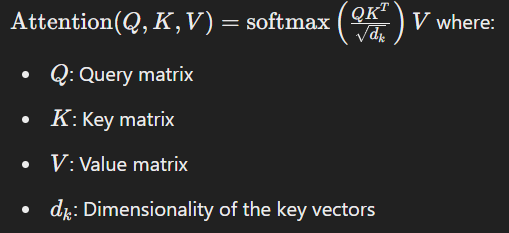

---

### Step-by-Step Implementation

1. **Install Libraries**
   We'll use `numpy` for matrix operations and `scipy` for additional utilities if needed.
   ```bash
   pip install numpy
   ```

2. **Implement Scaled Dot-Product Attention**
   ```python
   import numpy as np

   def scaled_dot_product_attention(query, key, value):
       """
       Compute the Scaled Dot-Product Attention.

       Args:
           query: The query matrix (shape: [batch_size, num_queries, d_k])
           key: The key matrix (shape: [batch_size, num_keys, d_k])
           value: The value matrix (shape: [batch_size, num_keys, d_v])

       Returns:
           output: The context matrix (shape: [batch_size, num_queries, d_v])
           attention_weights: The attention weights (shape: [batch_size, num_queries, num_keys])
       """
       # Step 1: Compute the dot product of query and key, then scale by sqrt(d_k)
       d_k = query.shape[-1]
       scores = np.matmul(query, key.transpose(0, 2, 1)) / np.sqrt(d_k)

       # Step 2: Apply the softmax function to normalize the scores
       attention_weights = softmax(scores, axis=-1)

       # Step 3: Compute the weighted sum of the values
       output = np.matmul(attention_weights, value)

       return output, attention_weights

   def softmax(x, axis=None):
       """Compute softmax values for each set of scores in x."""
       exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
       return exp_x / np.sum(exp_x, axis=axis, keepdims=True)
   ```

### Explanation
1. **`query`, `key`, `value`**: These matrices are 3D arrays representing multiple queries, keys, and values. The shape of these arrays is `[batch_size, num_queries/keys/values, d_k/d_v]`, where:
   - `batch_size` is the number of sequences being processed in parallel.
   - `d_k` is the dimensionality of the keys and queries.
   - `d_v` is the dimensionality of the values.

2. **Scaling**: We divide the dot product by the square root of `d_k` to stabilize the gradients.

3. **Softmax**: We apply softmax to get normalized attention scores.

4. **Output**: We compute the context by taking the weighted sum of the value vectors using the attention weights.

---

### Multi-Head Attention
Multi-Head Attention allows the model to attend to different parts of the sequence simultaneously by splitting the queries, keys, and values into multiple heads.

#### Implementation of Multi-Head Attention
1. **Understanding Multi-Head Attention**: Instead of computing attention once, we split the queries, keys, and values into multiple "heads," each of which performs scaled dot-product attention independently. We then concatenate these outputs and linearly project them to the desired dimensionality.

2. **Implement Multi-Head Attention**
   ```python
   class MultiHeadAttention:
       def __init__(self, num_heads, d_model):
           self.num_heads = num_heads
           self.d_model = d_model
           self.depth = d_model // num_heads

           # Weight matrices for linear transformations
           self.W_q = np.random.randn(d_model, d_model)
           self.W_k = np.random.randn(d_model, d_model)
           self.W_v = np.random.randn(d_model, d_model)
           self.W_o = np.random.randn(d_model, d_model)

       def split_heads(self, x, batch_size):
           """Split the last dimension into (num_heads, depth)."""
           x = x.reshape(batch_size, -1, self.num_heads, self.depth)
           return x.transpose(0, 2, 1, 3)  # [batch_size, num_heads, seq_len, depth]

       def call(self, query, key, value):
           batch_size = query.shape[0]

           # Linear projections
           Q = np.dot(query, self.W_q)
           K = np.dot(key, self.W_k)
           V = np.dot(value, self.W_v)

           # Split into multiple heads
           Q = self.split_heads(Q, batch_size)
           K = self.split_heads(K, batch_size)
           V = self.split_heads(V, batch_size)

           # Compute scaled dot-product attention for each head
           context, attention_weights = scaled_dot_product_attention(Q, K, V)

           # Concatenate heads and project the output
           context = context.transpose(0, 2, 1, 3).reshape(batch_size, -1, self.d_model)
           output = np.dot(context, self.W_o)

           return output, attention_weights
   ```

### Explanation
1. **Initialization**: We define a class `MultiHeadAttention` with the number of heads (`num_heads`) and the total dimensionality (`d_model`).
2. **Weight Matrices**: We create weight matrices `W_q`, `W_k`, `W_v`, and `W_o` for linear transformations of the input queries, keys, and values.
3. **Splitting Heads**: We split the input into multiple heads and transpose the dimensions to prepare for parallel computation.
4. **Attention for Each Head**: We compute the scaled dot-product attention for each head in parallel.
5. **Concatenation**: We concatenate the output of all heads and project it to the desired dimensionality using `W_o`.

---

### Next Steps
1. **Integrate with Deep Learning Frameworks**: Use TensorFlow or PyTorch to take advantage of GPU acceleration and work with real datasets.
2. **Explore the Transformer Model**: Study how these attention mechanisms are combined with feed-forward layers, positional encoding, and other components to build models like BERT and GPT.

Would you like an example of how to implement this using TensorFlow or PyTorch, or do you have another specific focus in mind?

In [13]:
# Scalar
import numpy as np

def scaled_dot_product_attention(query, key, value):
  """
  Compute the Scaled Dot-Product Attention.

  Args:
      query: The query matrix (shape: [batch_size, num_queries, d_k])
      key: The key matrix (shape: [batch_size, num_keys, d_k])
      value: The value matrix (shape: [batch_size, num_keys, d_v])

  Returns:
      output: The context matrix (shape: [batch_size, num_queries, d_v])
      attention_weights: The attention weights (shape: [batch_size, num_queries, num_keys])
  """
  # Step 1: Compute the dot product of query and key, then scale by sqrt(d_k)
  d_k = query.shape[-1]
  scores = np.matmul(query, key.transpose(0, 2, 1)) / np.sqrt(d_k)

  # Step 2: Apply the softmax function to normalize the scores
  attention_weights = softmax(scores, axis=-1)

  # Step 3: Compute the weighted sum of the values
  output = np.matmul(attention_weights, value)

  return output, attention_weights

def softmax(x, axis=None):
  """Compute softmax values for each set of scores in x."""
  exp_x = np.exp(x - np.max(x, axis = axis, keepdims=True))
  return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

In [14]:
# MultiHeadAttention
class MultiHeadAttention:
    def __init__(self, num_heads, d_model):
        self.num_heads = num_heads
        self.d_model = d_model
        self.depth = d_model // num_heads

        # Weight matrices for linear transformations
        self.W_q = np.random.randn(d_model, d_model)
        self.W_k = np.random.randn(d_model, d_model)
        self.W_v = np.random.randn(d_model, d_model)
        self.W_o = np.random.randn(d_model, d_model)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth)."""
        x = x.reshape(batch_size, -1, self.num_heads, self.depth)
        return x.transpose(0, 2, 1, 3)  # [batch_size, num_heads, seq_len, depth]

    def call(self, query, key, value):
        batch_size = query.shape[0]

        # Linear projections
        Q = np.dot(query, self.W_q)
        K = np.dot(key, self.W_k)
        V = np.dot(value, self.W_v)

        # Split into multiple heads
        Q = self.split_heads(Q, batch_size)
        K = self.split_heads(K, batch_size)
        V = self.split_heads(V, batch_size)

        # Compute scaled dot-product attention for each head
        context, attention_weights = scaled_dot_product_attention(Q, K, V)

        # Concatenate heads and project the output
        context = context.transpose(0, 2, 1, 3).reshape(batch_size, -1, self.d_model)
        output = np.dot(context, self.W_o)

        return output, attention_weights

Here's how to implement Scaled Dot-Product Attention and Multi-Head Attention using TensorFlow. We’ll walk through the complete implementation, showing how to leverage TensorFlow’s capabilities for building and training models.

---

## Implementation Using TensorFlow

### Step 1: Install TensorFlow
If you haven’t already installed TensorFlow, you can do so with:
```bash
pip install tensorflow
```

---

### Step 2: Import Libraries
```python
import tensorflow as tf
import numpy as np
```

---

### Step 3: Scaled Dot-Product Attention in TensorFlow
We’ll start by implementing the Scaled Dot-Product Attention function.

```python
def scaled_dot_product_attention(query, key, value):
    """
    Calculate the Scaled Dot-Product Attention.
    
    Args:
        query: Query tensor of shape (..., seq_len_q, depth)
        key: Key tensor of shape (..., seq_len_k, depth)
        value: Value tensor of shape (..., seq_len_v, depth_v)
        
    Returns:
        output: The attention output of shape (..., seq_len_q, depth_v)
        attention_weights: The attention weights of shape (..., seq_len_q, seq_len_k)
    """
    # Step 1: Compute the dot product between query and key
    matmul_qk = tf.matmul(query, key, transpose_b=True)

    # Step 2: Scale the dot product by sqrt of key dimension
    dk = tf.cast(tf.shape(key)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    # Step 3: Apply softmax to get the attention weights
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    # Step 4: Compute the weighted sum of the values
    output = tf.matmul(attention_weights, value)

    return output, attention_weights
```

### Explanation
- **`tf.matmul(query, key, transpose_b=True)`**: Computes the dot product between the query and key, transposing the key matrix to align dimensions.
- **`dk = tf.cast(tf.shape(key)[-1], tf.float32)`**: Gets the dimensionality of the keys and converts it to `float32` for scaling.
- **`tf.math.sqrt(dk)`**: Computes the square root for scaling.
- **`tf.nn.softmax`**: Normalizes the attention scores using softmax.
- **`tf.matmul(attention_weights, value)`**: Applies the attention weights to the values.

---

### Step 4: Multi-Head Attention in TensorFlow
We’ll use TensorFlow layers to create the Multi-Head Attention mechanism.

```python
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % num_heads == 0  # Ensure that d_model is divisible by num_heads

        self.depth = d_model // num_heads

        # Linear layers for query, key, and value
        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        # Output linear layer
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth)."""
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])  # (batch_size, num_heads, seq_len, depth)

    def call(self, query, key, value):
        batch_size = tf.shape(query)[0]

        # Linear projections
        query = self.wq(query)  # (batch_size, seq_len, d_model)
        key = self.wk(key)      # (batch_size, seq_len, d_model)
        value = self.wv(value)  # (batch_size, seq_len, d_model)

        # Split into multiple heads
        query = self.split_heads(query, batch_size)  # (batch_size, num_heads, seq_len, depth)
        key = self.split_heads(key, batch_size)      # (batch_size, num_heads, seq_len, depth)
        value = self.split_heads(value, batch_size)  # (batch_size, num_heads, seq_len, depth)

        # Scaled dot-product attention
        context, attention_weights = scaled_dot_product_attention(query, key, value)

        # Concatenate heads
        context = tf.transpose(context, perm=[0, 2, 1, 3])  # (batch_size, seq_len, num_heads, depth)
        context = tf.reshape(context, (batch_size, -1, self.d_model))  # (batch_size, seq_len, d_model)

        # Final linear layer
        output = self.dense(context)  # (batch_size, seq_len, d_model)

        return output, attention_weights
```

### Explanation
1. **Initialization**:
   - `d_model`: Total dimensionality of the model.
   - `num_heads`: Number of attention heads.
   - `self.depth = d_model // num_heads`: Depth of each attention head.
   - Linear layers (`Dense`) are used to project the queries, keys, and values.

2. **`split_heads` Function**: Splits the input tensor into multiple heads and transposes the dimensions for parallel computation.

3. **`call` Method**:
   - Projects the inputs using linear layers to get queries, keys, and values.
   - Splits them into multiple heads.
   - Computes scaled dot-product attention for each head.
   - Concatenates the outputs and applies a final linear layer.

---

### Step 5: Testing Multi-Head Attention
You can test the `MultiHeadAttention` layer as follows:

```python
# Define input tensors
batch_size = 2
seq_len = 5
d_model = 8
num_heads = 2

query = tf.random.uniform((batch_size, seq_len, d_model))
key = tf.random.uniform((batch_size, seq_len, d_model))
value = tf.random.uniform((batch_size, seq_len, d_model))

# Initialize and call the MultiHeadAttention layer
mha = MultiHeadAttention(d_model, num_heads)
output, attention_weights = mha(query, key, value)

print("Output shape:", output.shape)  # (batch_size, seq_len, d_model)
print("Attention weights shape:", attention_weights.shape)  # (batch_size, num_heads, seq_len, seq_len)
```

---

### Next Steps
1. **Integrate with Transformer Architecture**: Multi-Head Attention is a crucial component of the Transformer model. You can combine it with positional encoding, feed-forward networks, and layer normalization to build a complete Transformer.
2. **Train on Real Data**: Use TensorFlow’s `tf.data` API to load and preprocess datasets for tasks like machine translation, text classification, or text summarization.
3. **Experiment with Hyperparameters**: Adjust `d_model` and `num_heads` to see how they impact performance.

Would you like more guidance on building a full Transformer model or on training a model using a real dataset?

###**Step 2**

In [4]:
import tensorflow as tf

###**Step 3**

In [5]:
def scaled_dot_product_attention(query, key, value):
  """
  Calculate the Scaled Dot-Product Attention.

  Args:
      query: Query tensor of shape (..., seq_len_q, depth)
      key: Key tensor of shape (..., seq_len_k, depth)
      value: Value tensor of shape (..., seq_len_v, depth_v)

  Returns:
      output: The attention output of shape (..., seq_len_q, depth_v)
      attention_weights: The attention weights of shape (..., seq_len_q, seq_len_k)
  """
  # Step 1: Compute the dot product between query and key
  matmul_qk = tf.matmul(query, key, transpose_b=True)

  # Step 2: Scale the dot product by sqrt of key dimension
  dk = tf.cast(tf.shape(key)[-1], tf.float32)
  scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

  # Step 3: Apply softmax to get the attention weights
  attention_weights =tf.nn.softmax(scaled_attention_logits, axis=-1)

  # Step 4: Compute the weighted sum of the values
  output = tf.matmul(attention_weights, value)

  return output, attention_weights

###**Step 4**

In [11]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        self.depth = d_model // num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        """Split the last dimension into (num_heads, depth) and transpose the result."""
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])  # (batch_size, num_heads, seq_len, depth)

    def call(self, query, key, value, mask=None):
        batch_size = tf.shape(query)[0]

        # Linear projections
        query = self.wq(query)  # (batch_size, seq_len, d_model)
        key = self.wk(key)      # (batch_size, seq_len, d_model)
        value = self.wv(value)  # (batch_size, seq_len, d_model)

        # Split into multiple heads
        query = self.split_heads(query, batch_size)  # (batch_size, num_heads, seq_len, depth)
        key = self.split_heads(key, batch_size)      # (batch_size, num_heads, seq_len, depth)
        value = self.split_heads(value, batch_size)  # (batch_size, num_heads, seq_len, depth)

        # Apply scaled dot-product attention
        context, attention_weights = scaled_dot_product_attention(query, key, value, mask)

        # Concatenate the heads
        context = tf.transpose(context, perm=[0, 2, 1, 3])  # (batch_size, seq_len, num_heads, depth)
        context = tf.reshape(context, (batch_size, -1, self.d_model))  # (batch_size, seq_len, d_model)

        # Final linear layer
        output = self.dense(context)  # (batch_size, seq_len, d_model)

        return output, attention_weights


###**Step 5**

In [12]:
# Define input tensors
batch_size = 2
seq_len = 5
d_model = 8
num_heads = 2

query = tf.random.uniform((batch_size, seq_len, d_model))
key = tf.random.uniform((batch_size, seq_len, d_model))
value = tf.random.uniform((batch_size, seq_len, d_model))

# Initialize and call the MultiHeadAttention layer
mha = MultiHeadAttention(d_model, num_heads)
output, attention_weights = mha(query, key, value)

print("Output shape:", output.shape) # (batch_size, seq_len, d_model)
print("Attention weights shape: ", attention_weights.shape) # (batch_size, num_heads, seq_len, seq_len)

TypeError: Exception encountered when calling MultiHeadAttention.call().

[1mscaled_dot_product_attention() takes 3 positional arguments but 4 were given[0m

Arguments received by MultiHeadAttention.call():
  • query=tf.Tensor(shape=(2, 5, 8), dtype=float32)
  • key=tf.Tensor(shape=(2, 5, 8), dtype=float32)
  • value=tf.Tensor(shape=(2, 5, 8), dtype=float32)
  • mask=None

## Steps to Build a Transformer Model Using a Real Dataset

### Step 1: Load and Preprocess the Dataset
- Choose a real-world dataset suitable for a sequence-to-sequence task, such as language translation (e.g., English to French).
- Tokenize and encode the text into sequences of integers.
- Pad or truncate sequences to a fixed length.

### Step 2: Create Positional Encoding
- Implement positional encoding to give the model information about the relative position of tokens in a sequence.

### Step 3: Define the Attention Mechanisms
- Implement the scaled dot-product attention and multi-head attention layers.

### Step 4: Build the Transformer Model
- Create the encoder and decoder layers using attention mechanisms and feed-forward networks.
- Combine these components into the complete Transformer model.

### Step 5: Define a Loss Function and Optimizer
- Use an appropriate loss function, such as categorical cross-entropy, and an optimizer like Adam.

### Step 6: Train the Model
- Train the model on your dataset, monitor the loss, and adjust hyperparameters as needed.
- Evaluate the model on a validation set to check its performance.

### Step 7: Test the Model
- Use the trained model to generate predictions and evaluate its performance on unseen data.

---

## Code to Implement a Transformer Model (Full Example)

### Step 1: Load and Preprocess the Dataset
For this example, let's use the TensorFlow Datasets library to load the "English-German" translation dataset.

```python
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the dataset
examples, metadata = tfds.load('ted_hrlr_translate/pt_to_en', with_info=True, as_supervised=True)
train_examples, val_examples = examples['train'], examples['validation']

# Function to preprocess the text
def tokenize_pairs(pt, en):
    pt = tokenizer_pt.encode(pt.numpy())
    en = tokenizer_en.encode(en.numpy())
    return pt, en

# Tokenizers (you may need to download and set up SentencePiece or use another tokenizer)
# NOTE: You would need to implement or load tokenizers as appropriate for your dataset.
```

### Step 2: Create Positional Encoding
```python
import numpy as np

def get_angles(pos, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return pos * angle_rates

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    # Apply sin to even indices and cos to odd indices
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)
```

### Step 3: Implement Scaled Dot-Product Attention and Multi-Head Attention
```python
def scaled_dot_product_attention(query, key, value, mask):
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    dk = tf.cast(tf.shape(key)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, value)
    return output, attention_weights

class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % num_heads == 0
        self.depth = d_model // num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)
        self.dense = tf.keras.layers.Dense(d_model)

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])

    def call(self, query, key, value, mask):
        batch_size = tf.shape(query)[0]
        query = self.split_heads(self.wq(query), batch_size)
        key = self.split_heads(self.wk(key), batch_size)
        value = self.split_heads(self.wv(value), batch_size)

        context, attention_weights = scaled_dot_product_attention(query, key, value, mask)
        context = tf.transpose(context, perm=[0, 2, 1, 3])
        context = tf.reshape(context, (batch_size, -1, self.d_model))
        output = self.dense(context)
        return output, attention_weights
```

### Step 4: Build the Transformer Model
This part is a bit more involved. The Transformer model consists of an encoder and a decoder.

```python
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size,
                 target_vocab_size, pe_input, pe_target):
        super(Transformer, self).__init__()
        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input)
        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target)
        self.final_layer = tf.keras.layers.Dense(target_vocab_size)

    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)
        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)
        return final_output, attention_weights
```

### Step 5: Define Loss Function and Optimizer
```python
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')

def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_sum(loss_) / tf.reduce_sum(mask)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
```

---

### Step 6: Train the Model
```python
EPOCHS = 20

for epoch in range(EPOCHS):
    print(f'Epoch {epoch+1}/{EPOCHS}')
    # Implement training loop here
```

